In [132]:
#library(data.table)
library(tidyverse)
library(lubridate)
library(ggplot2)

In [133]:
FILE_DIR <- '../input/hawaiiml-data'
for (f in dir(FILE_DIR, full.names=T, pattern='.csv'))  
  print(sprintf('%-30s %0.2f MB', f, file.size(f)/1e6))

In [134]:
train <- read_csv(sprintf('train.csv', FILE_DIR))
test  <- read_csv(sprintf('test.csv', FILE_DIR))

Parsed with column specification:
cols(
  id = col_integer(),
  date = col_character(),
  time = col_time(format = ""),
  invoice_id = col_integer(),
  stock_id = col_integer(),
  customer_id = col_integer(),
  country = col_character(),
  description = col_character(),
  unit_price = col_double(),
  quantity = col_integer()
)
Parsed with column specification:
cols(
  id = col_integer(),
  date = col_character(),
  time = col_time(format = ""),
  invoice_id = col_integer(),
  stock_id = col_integer(),
  customer_id = col_integer(),
  country = col_character(),
  description = col_character(),
  unit_price = col_double()
)


In [135]:
head(train)

id,date,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity
330477,8/30/2011,12:26:00,357,198,7,united kingdom,french blue metal door sign 3,2.46,1
113814,11/1/2011,14:54:00,6757,2747,410,united kingdom,paper lantern 9 point deluxe star,6.65,4
51510,7/11/2011,16:21:00,52,755,7,united kingdom,fruit salad bag charm,2.46,1
257784,10/11/2011,14:52:00,3642,1942,1722,france,set of 10 led dolly lights,6.25,2
431803,11/14/2011,14:59:00,2105,39,1159,united kingdom,glitter christmas star,0.39,5
473125,12/3/2010,11:35:00,1768,506,1009,united kingdom,set 20 napkins fairy cakes design,0.85,1


In [136]:
head(test)

id,date,time,invoice_id,stock_id,customer_id,country,description,unit_price
36260,4/3/2011,15:22:00,2,2,2,united kingdom,lunch bag pink polkadot,1.65
156272,9/14/2011,15:41:00,10,9,9,united kingdom,mint diner wall clock,7.65
155140,12/16/2010,14:27:00,11,10,10,united kingdom,red drawer knob acrylic edwardian,1.25
504947,3/7/2011,12:31:00,12,11,11,united kingdom,kitchen metal sign,0.55
65461,10/25/2011,13:17:00,16,15,14,united kingdom,vintage cream cat food container,6.35
307052,7/19/2011,12:43:00,17,16,15,finland,toilet metal sign,0.55


In [137]:
train[15,]

id,date,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity
105360,8/8/2011,15:34:00,2415,612,7,united kingdom,set of 3 regency cake tins,5.79,8


In [138]:
# I have questions about dates:
dates <- as.Date(train$date, format = "%m/%d/%Y")
print(dates[15])

[1] "2011-08-08"


In [139]:
#Now i want to add the dates back onto train.
train <- cbind(train,dates)

In [140]:
#mwahaha
head(train)

id,date,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity,dates
330477,8/30/2011,12:26:00,357,198,7,united kingdom,french blue metal door sign 3,2.46,1,2011-08-30
113814,11/1/2011,14:54:00,6757,2747,410,united kingdom,paper lantern 9 point deluxe star,6.65,4,2011-11-01
51510,7/11/2011,16:21:00,52,755,7,united kingdom,fruit salad bag charm,2.46,1,2011-07-11
257784,10/11/2011,14:52:00,3642,1942,1722,france,set of 10 led dolly lights,6.25,2,2011-10-11
431803,11/14/2011,14:59:00,2105,39,1159,united kingdom,glitter christmas star,0.39,5,2011-11-14
473125,12/3/2010,11:35:00,1768,506,1009,united kingdom,set 20 napkins fairy cakes design,0.85,1,2010-12-03


In [141]:
#removing "date" column because now I have "dates" column
train <- train[,-2]
head(train)

id,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity,dates
330477,12:26:00,357,198,7,united kingdom,french blue metal door sign 3,2.46,1,2011-08-30
113814,14:54:00,6757,2747,410,united kingdom,paper lantern 9 point deluxe star,6.65,4,2011-11-01
51510,16:21:00,52,755,7,united kingdom,fruit salad bag charm,2.46,1,2011-07-11
257784,14:52:00,3642,1942,1722,france,set of 10 led dolly lights,6.25,2,2011-10-11
431803,14:59:00,2105,39,1159,united kingdom,glitter christmas star,0.39,5,2011-11-14
473125,11:35:00,1768,506,1009,united kingdom,set 20 napkins fairy cakes design,0.85,1,2010-12-03


In [142]:
#Extracting month data from whole dates 
months <- month(train$dates, label=FALSE)

In [143]:
head(months)

[1]  8 11  7 10 11 12

In [144]:
#cbinding to the data 
train = cbind(train, months)

In [145]:
typeof(train$description)

[1] "character"

In [146]:
print(train[1,7])

[1] "french blue metal door sign 3"


In [147]:
christmas_col = grep("glitter christmas", train$description)

In [148]:
xmas = train[christmas_col,]
xmas

,id,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity,dates,months
5,431803,14:59:00,2105,39,1159,united kingdom,glitter christmas star,0.39,5,2011-11-14,11
1248,223806,12:47:00,2465,39,1296,united kingdom,glitter christmas star,0.39,36,2011-11-14,11
2425,528599,10:23:00,40,2895,34,united kingdom,glitter christmas tree,0.39,36,2011-10-12,10
3786,103187,16:27:00,6988,39,2620,france,glitter christmas star,0.39,2,2011-11-10,11
4469,410865,10:48:00,4047,2895,1478,united kingdom,glitter christmas tree,0.39,36,2011-09-30,9
7557,385367,14:59:00,3920,39,74,eire,glitter christmas star,0.39,36,2011-10-11,10
8618,53848,14:11:00,5219,2895,2173,united kingdom,glitter christmas tree,0.39,1,2011-10-18,10
8724,432128,13:08:00,7232,39,949,united kingdom,glitter christmas star,0.39,7,2011-12-01,12
9144,250809,11:46:00,10626,111,1076,united kingdom,glitter christmas heart,0.85,10,2010-12-12,12
9874,163950,11:40:00,6535,947,2395,united kingdom,glitter christmas tree with bells,0.79,12,2011-11-23,11


In [149]:
unique(train$country)

[1] "united kingdom"       "france"               "switzerland"         
 [4] "belgium"              "eire"                 "norway"              
 [7] "germany"              "netherlands"          "italy"               
[10] "cyprus"               "portugal"             "sweden"              
[13] "poland"               "austria"              "denmark"             
[16] "finland"              "australia"            "spain"               
[19] "channel islands"      "israel"               "canada"              
[22] "european community"   "hong kong"            "unspecified"         
[25] "greece"               "iceland"              "japan"               
[28] "brazil"               "malta"                "rsa"                 
[31] "usa"                  "lithuania"            "singapore"           
[34] "united arab emirates" "lebanon"              "czech republic"      
[37] "bahrain"              "saudi arabia"

In [150]:
hist(train$country)

ERROR: Error in hist.default(train$country): 'x' must be numeric


In [ ]:
library(ggplot2)
ggplot(train, aes(x=dates, y=unit_price))+geom_point()

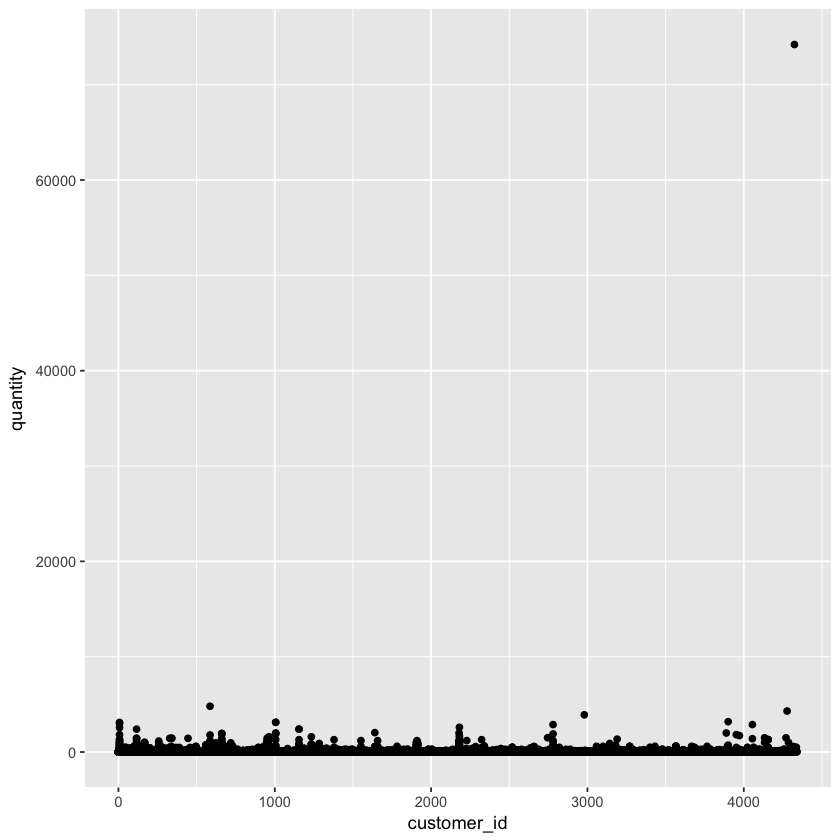

In [151]:
ggplot(train, aes(x=customer_id, y=quantity))+geom_point()

In [152]:
#created mean for unit price - going to do min and max as well.
train %>% group_by(stock_id) %>% summarise(min(unit_price))

stock_id,min(unit_price)
1,0.36
2,1.45
3,8.50
4,0.53
5,1.65
6,0.00
7,0.83
8,0.22
9,7.65
10,0.85


In [170]:
# mutated the data to add mean  of unit price to the dataset. 
train = train %>%
  group_by(stock_id) %>% mutate(mean_price = mean(unit_price))

In [171]:
# mutated the data to add max of unit price to the dataset. 
train = train %>%
  group_by(stock_id) %>% mutate(max_price = max(unit_price))

In [172]:
# mutated the data to add min of unit price to the dataset. 
train = train %>%
  group_by(stock_id) %>% mutate(min_price = min(unit_price))

In [173]:
# mutated the data to add median of unit price to the dataset. 
train = train %>%
  group_by(stock_id) %>% mutate(median_price = median(unit_price))

In [176]:
train

id,time,invoice_id,stock_id,customer_id,country,description,unit_price,quantity,dates,months,mean_price,max_price,min_price,median_price,median_diff,min_diff,mean_diff
330477,12:26:00,357,198,7,united kingdom,french blue metal door sign 3,2.46,1,2011-08-30,8,1.5896032,2.95,0.00,1.25,1.21,2.46,0.870396825
113814,14:54:00,6757,2747,410,united kingdom,paper lantern 9 point deluxe star,6.65,4,2011-11-01,11,6.6500000,6.65,6.65,6.65,0.00,0.00,0.000000000
51510,16:21:00,52,755,7,united kingdom,fruit salad bag charm,2.46,1,2011-07-11,7,2.4071795,2.51,1.69,2.46,0.00,0.77,0.052820513
257784,14:52:00,3642,1942,1722,france,set of 10 led dolly lights,6.25,2,2011-10-11,10,6.4958052,12.46,5.39,6.25,0.00,0.86,-0.245805243
431803,14:59:00,2105,39,1159,united kingdom,glitter christmas star,0.39,5,2011-11-14,11,0.5508654,1.66,0.39,0.39,0.00,0.00,-0.160865385
473125,11:35:00,1768,506,1009,united kingdom,set 20 napkins fairy cakes design,0.85,1,2010-12-03,12,0.9779675,1.66,0.72,0.85,0.00,0.13,-0.127967480
223094,17:00:00,779,1295,7,united kingdom,gingham heart decoration,1.63,3,2011-11-15,11,1.0148077,1.66,0.72,0.85,0.78,0.91,0.615192308
314901,14:09:00,404,923,13,united kingdom,calendar paper cut design,5.79,1,2011-10-31,10,3.4050244,5.91,2.55,2.95,2.84,3.24,2.384975610
377668,11:55:00,13526,251,1829,united kingdom,ivory knitted mug cosy,1.65,6,2011-11-07,11,2.6137805,3.36,1.45,3.29,-1.64,0.20,-0.963780488
238904,12:15:00,2319,2789,773,united kingdom,mirrored wall art gents,0.75,1,2011-07-05,7,2.1529412,5.06,0.75,0.75,0.00,0.00,-1.402941176


In [177]:
# subtracted unit price from median price to get the difference. 
train = train %>% mutate(median_diff = unit_price - median_price)

In [178]:
# subtracted unit price from mean price to get the difference. 
train = train %>% mutate(mean_diff = unit_price - mean_price)

In [179]:
# subtracted unit price from min price to get the difference. 
train = train %>% mutate(min_diff = unit_price - min_price)

In [180]:
# subtracted max price from unit price to get the difference. 
train = train %>% mutate(max_diff = max_price - unit_price)

In [11]:
train

ERROR: Error in eval(expr, envir, enclos): object 'train' not found


In [14]:
filter(train$stock_id == 198)

ERROR: Error in as.ts(x): object 'train' not found


In [183]:
write.csv(train, "train2.csv")